<a href="https://colab.research.google.com/github/Calybos/Zindi_projects/blob/main/fin_inclusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project: **Financial Inclusion in Africa**

Link: *zindi.africa/competitions/financial-inclusion-in-africa*

Objective: Can you predict who in Africa is most likely to have a bank account?

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

!pip install category_encoders
from category_encoders import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline

# Preparing Data

In [ ]:
df = pd.read_csv("/content/Train.csv")
print(df.shape)
df.head()

(23524, 13)


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


**Explore**

In [ ]:
df["bank_account"].value_counts(normalize=True)

No     0.859208
Yes    0.140792
Name: bank_account, dtype: float64

In [ ]:
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

<Axes: >

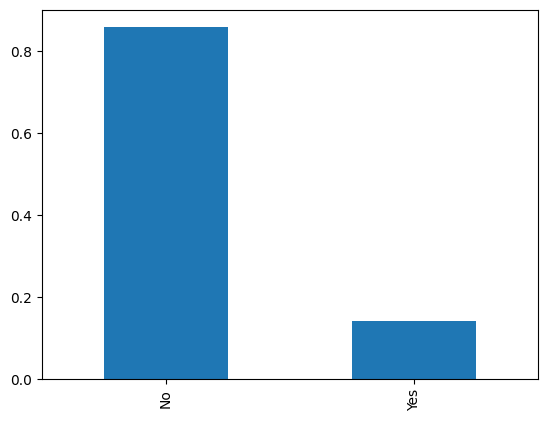

In [ ]:
df["bank_account"].value_counts(normalize=True).plot(kind="bar")

In [ ]:
df["bank_account"].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
# recasting bank_acc to int (1=Yes, 0=No)
df["bank_account"]= (df["bank_account"] == "Yes").astype(int)
df["bank_account"].head()

0    1
1    0
2    1
3    0
4    0
Name: bank_account, dtype: int64

In [ ]:
#  confirmation
df["bank_account"].value_counts(normalize=True).plot(kind="bar")

0    0.859208
1    0.140792
Name: bank_account, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  int64 
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(4), object(9)
memory usage: 2.3+ MB


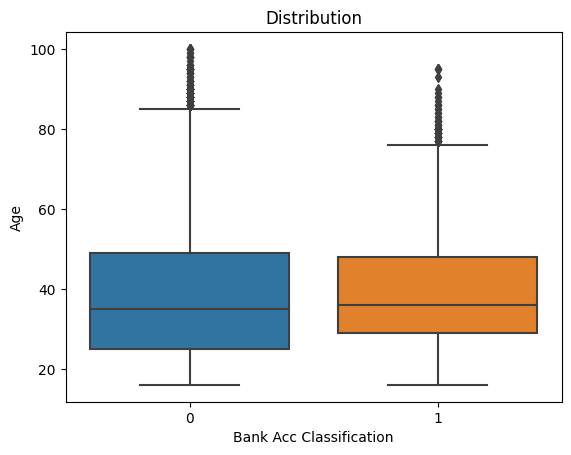

In [ ]:
# distribution of account per age (boxplot)
sns.boxplot(x="bank_account", y="age_of_respondent", data=df)

# Label axes
plt.xlabel("Bank Acc Classification")
plt.ylabel("Age")
plt.title("Distribution");

In [ ]:
# proportional distribution per country
# Create pivot table
country_pivot = pd.pivot_table(
    df, index= "country", values="bank_account", aggfunc=np.mean
    ).sort_values(by="bank_account")

country_pivot

,bank_account
country,
Uganda,0.086149
Tanzania,0.091692
Rwanda,0.114825
Kenya,0.250659


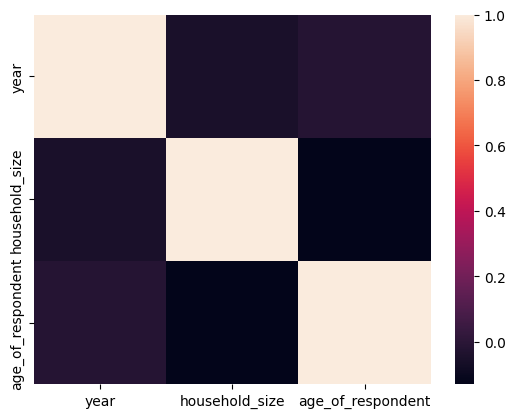

In [ ]:
# correlation
correlation = (
    df.select_dtypes("number")
    .drop(columns="bank_account")
    .corr()
)

# Plot heatmap of `correlation`
sns.heatmap(correlation);

In [ ]:
# Checking for high- and low-cardinality categorical features
df.select_dtypes("object").nunique()

country                      4
uniqueid                  8735
location_type                2
cellphone_access             2
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64

In [ ]:
# dropping high card var
df.drop(columns="uniqueid", inplace=True)

In [ ]:
print(df.shape)
df.info()

(23524, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   bank_account            23524 non-null  int64 
 3   location_type           23524 non-null  object
 4   cellphone_access        23524 non-null  object
 5   household_size          23524 non-null  int64 
 6   age_of_respondent       23524 non-null  int64 
 7   gender_of_respondent    23524 non-null  object
 8   relationship_with_head  23524 non-null  object
 9   marital_status          23524 non-null  object
 10  education_level         23524 non-null  object
 11  job_type                23524 non-null  object
dtypes: int64(4), object(8)
memory usage: 2.2+ MB


Spliting into train val for internal evalualtion before test evaluation

In [ ]:
# vector-target spitting
target = "bank_account"
X = df.drop(columns=target)
y = df[target]


In [ ]:
# train_val split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.1, random_state=42
)

print(f"For X, train:{X_train.shape}, val:{X_val.shape}")
print(f'For y, train:{y_train.shape}, val:{y_val.shape}')

For X, train:(21171, 11), val:(2353, 11)
For y, train:(21171,), val:(2353,)


# Model Building

In [ ]:
#baseline accuracy score
y_train.value_counts(normalize=True).max()

0.8589107741722167

In [ ]:
# build model
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LogisticRegression(max_iter=10_000)
)
# fit model
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['country', 'location_type',
                                     'cellphone_access', 'gender_of_respondent',
                                     'relationship_with_head', 'marital_status',
                                     'education_level', 'job_type'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=10000))])

In [ ]:
# Evaluation
train_acc = model.score(X_train, y_train)
val_acc = model.score(X_val, y_val)

print("Training Accuracy:", round(train_acc, 4))
print("Test Accuracy:", round(val_acc, 4))

Training Accuracy: 0.8855
Test Accuracy: 0.8865


Since both scores beat the base_line score of 0.8589, I'll proceed to
evaluate the model based on the test data.

In [ ]:
# test data evaluataion
test_df = pd.read_csv("/content/Test.csv")
test_df.shape
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  object
 4   cellphone_access        10086 non-null  object
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  object
 8   relationship_with_head  10086 non-null  object
 9   marital_status          10086 non-null  object
 10  education_level         10086 non-null  object
 11  job_type                10086 non-null  object
dtypes: int64(3), object(9)
memory usage: 945.7+ KB


In [ ]:
# test vector
X_test = test_df.drop(columns="uniqueid")

# predicting bank account possesion
test_df["bank_account"] = model.predict(X_test)

In [ ]:
test_df["bank_account"].head()

0    1
1    1
2    0
3    0
4    0
Name: bank_account, dtype: int64

In [ ]:
# creating target and evaluating accuracy on test data
target = "bank_account"
y_test = test_df[target]
model.score(X_test, y_test)

1.0

In [ ]:
#how to get feature names and coefficients from a logistic model
features = model.named_steps["onehotencoder"].get_feature_names()
importances = model.named_steps["logisticregression"].coef_[0]

# Saving result for submission

In [ ]:
# Create submission DataFrame
submission = pd.DataFrame(
    {"uniqueid": test_df["uniqueid"] + " x " + test_df["country"],
     "bank_account": test_df["bank_account"]}
    )
#show the five sample
submission.sample(5)

,uniqueid,bank_account
3726,uniqueid_9861 x Rwanda,0
140,uniqueid_6209 x Kenya,0
9964,uniqueid_2881 x Uganda,0
4647,uniqueid_10782 x Rwanda,0
5554,uniqueid_11689 x Rwanda,0


In [ ]:
# Create submission csv file
submission.to_csv('first_submission.csv', index = False)


Take note: the proportion of Yes to No from the target var(bank_account)
is not well balanced ie: about 14 against 86 percent. This should be accounted for.